Load the data

In [39]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Trimmed_Time_Series_Data.csv')

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI
0,1071,1986-01-01,Alberta,859000,4130.0,3778.1,7477.0,28.0,22.5,26.4
1,1072,1986-01-01,British Columbia,1132000,9185.0,11098.4,23454.0,79.5,49.2,66.3
2,1073,1986-01-01,Manitoba,392000,3327.0,4076.4,10631.0,37.7,26.9,34.7
3,1074,1986-01-01,New Brunswick,237000,2190.0,749.3,3453.0,75.1,56.1,70.5
4,1075,1986-01-01,Newfoundland and Labrador,161000,1145.0,507.7,6337.0,39.4,35.3,38.7


# EDA

In [40]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default aesthetics for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [41]:
# Display basic information
print("DataFrame Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4194 non-null   int64  
 1   REF_DATE                     4194 non-null   object 
 2   GEO                          4194 non-null   object 
 3   Number_of_Households         4194 non-null   int64  
 4   Housing completions          4194 non-null   float64
 5   Housing starts               4194 non-null   float64
 6   Housing under construction   4194 non-null   float64
 7   House only NHPI              4086 non-null   float64
 8   Land only NHPI               4086 non-null   float64
 9   Total (house and land) NHPI  4086 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 327.8+ KB
None

Summary Statistics:
        Unnamed: 0  Number_of_Households  Housing completions  Housing starts  \
count  419

## Handling Missing Values
We notice that the NHPI-related columns have some missing values. We can inspect these missing values and decide on a strategy (e.g., imputation or removal).

In [42]:
# Drop records with missing values in NHPI columns
nhpi_cols = ['House only NHPI', 'Land only NHPI', 'Total (house and land) NHPI']
df.dropna(subset=nhpi_cols, inplace=True)


In [72]:

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [47]:
# Check for null values
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
REF_DATE                       0
GEO                            0
Number_of_Households           0
Housing completions            0
Housing starts                 0
Housing under construction     0
House only NHPI                0
Land only NHPI                 0
Total (house and land) NHPI    0
dtype: int64


In [38]:
#Convert the `REF_DATE` column from object to datetime format, and extract the year to facilitate time-series analysis.

df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df['Year'] = df['REF_DATE'].dt.year


In [45]:
df.shape

(4086, 9)

## Outlier Analysis using Boxplots


Outliers detected in Housing completions: 132


,REF_DATE,GEO,Housing completions,Housing completions_zscore
3815,2021-04-01,Canada,165332.0,6.802589
170,1987-07-01,Canada,163382.0,6.715142
3842,2021-07-01,Canada,162097.0,6.657517
3734,2020-07-01,Canada,157464.0,6.449752
3950,2022-07-01,Canada,157325.0,6.443519


Outliers detected in Housing starts: 126


,REF_DATE,GEO,Housing starts,Housing starts_zscore
3815,2021-04-01,Canada,199796.0,7.332005
3950,2022-07-01,Canada,198872.0,7.295257
3923,2022-04-01,Canada,196313.0,7.193482
3869,2021-10-01,Canada,186983.0,6.822418
143,1987-04-01,Canada,186139.4,6.788867


Outliers detected in Housing under construction: 96


,REF_DATE,GEO,Housing under construction,Housing under construction_zscore
3977,2022-10-01,Canada,1076931.0,10.836703
3950,2022-07-01,Canada,1045578.0,10.506429
3923,2022-04-01,Canada,1004131.0,10.069823
3869,2021-10-01,Canada,958170.0,9.585667
3896,2022-01-01,Canada,954863.0,9.550831


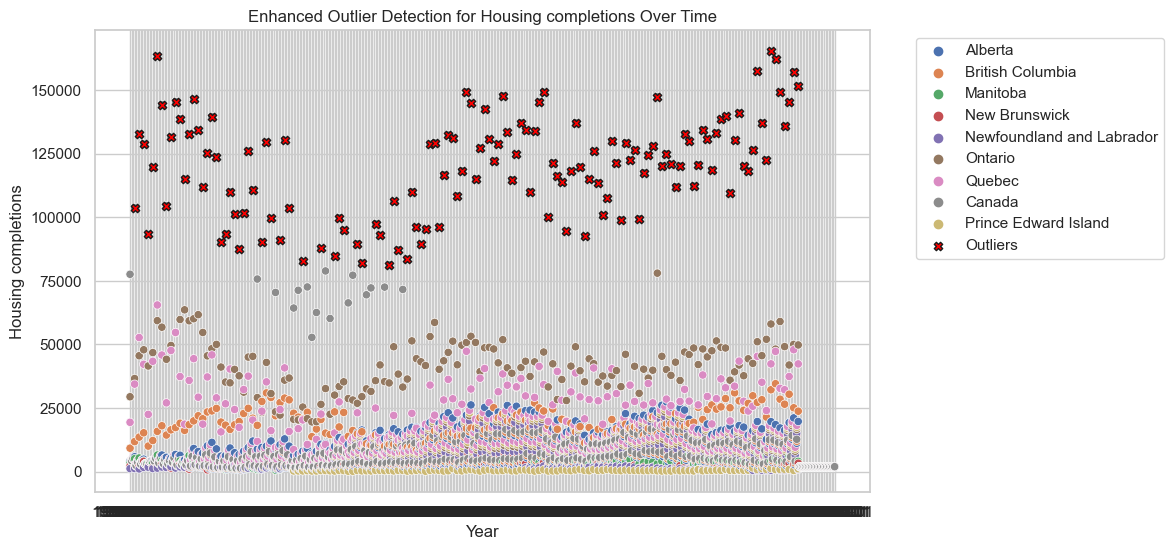

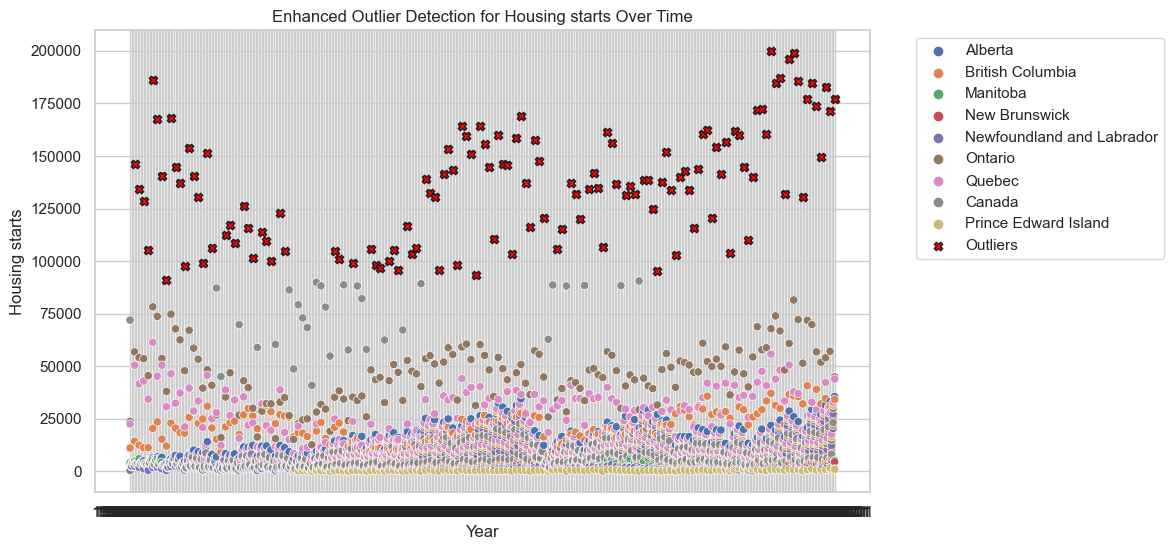

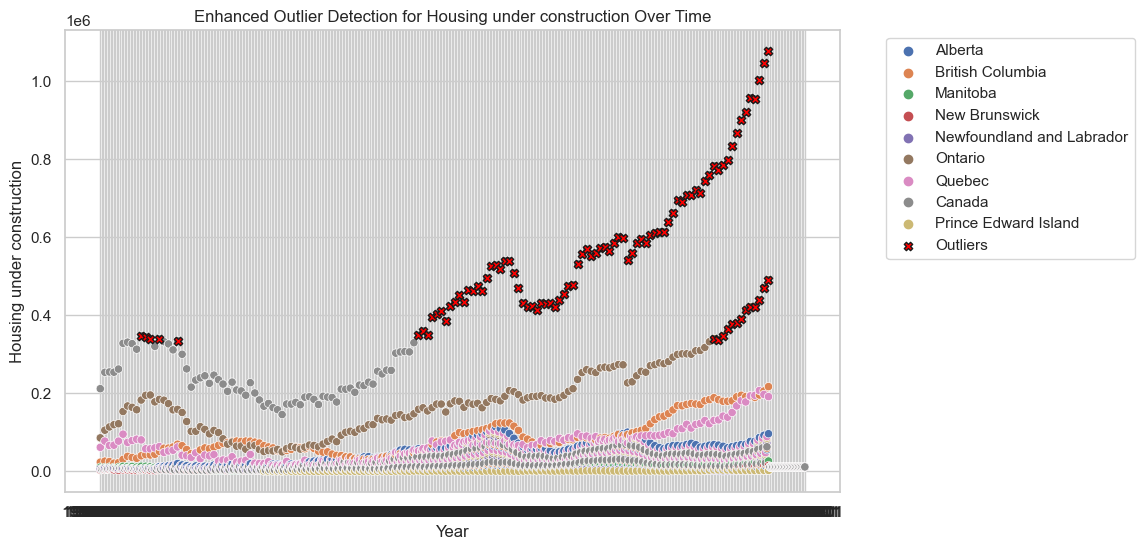

In [50]:
# Enhanced Outlier Detection using Z-score
from scipy import stats

numerical_features = ['Housing completions', 'Housing starts', 'Housing under construction']
for col in numerical_features:
    df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()
    df_outliers = df[np.abs(df[f'{col}_zscore']) > 3]
    print(f"Outliers detected in {col}: {len(df_outliers)}")
    display(df_outliers[['REF_DATE', 'GEO', col, f'{col}_zscore']].sort_values(by=f'{col}_zscore', ascending=False).head())

# Visualizing Enhanced Outliers using Scatterplot
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='REF_DATE', y=col, hue='GEO')
    outliers = df[np.abs(df[f'{col}_zscore']) > 3]
    plt.scatter(outliers['REF_DATE'], outliers[col], color='red', label='Outliers', edgecolor='k', marker='X')
    plt.title(f'Enhanced Outlier Detection for {col} Over Time')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

 **Conclusions from the Enhanced Outlier Detection Analysis**

### **1️ Housing Under Construction Over Time**
- **Trend:** Significant increase in housing under construction, especially after **2000**, with a **steep rise post-2010** and an even larger **spike post-2020**.
- **Outliers:**
  - Sharp increases post-2015 and a **massive jump post-2020**.
  - **Possible causes:** Government incentives, economic recovery, rising demand, and migration.
  - **Regions most affected:** Canada-wide, **Ontario, Quebec, and British Columbia** show the largest spikes.

 **Potential Business Concerns:**
- Supply chain constraints—delays in completions may drive price hikes.
- Labor shortages or rising material costs may impact housing affordability.

---



### **2️ Housing Starts Over Time**
- **Trend:**
  - Relatively stable until **2010**, then a **notable increase in starts**.
  - **Major spikes post-2015 and post-pandemic (2020-2022)** indicate a demand surge.
- **Outliers:**
  - **Sharp increases post-2009, post-2015, and post-2020.**
  - The **2008 Financial Crisis impact is visible** as a **drop in starts followed by a rapid recovery**.

 **Potential Business Concerns:**
- Is the **surge in housing starts driven by real demand** (population growth, migration) or **speculative investment**?
- Is there a risk of **oversupply**, or is the housing market balanced with completions?

---

### **3️ Housing Completions Over Time**
- **Trend:**
  - **Relatively steady growth from 1985 to 2005**, followed by a **sharp rise post-2010**.
  - **Post-pandemic (2020-2023) increases suggest a recovery from previous construction slowdowns**.
- **Outliers:**
  - **Drop during 2008-2010 Financial Crisis, followed by a rebound.**
  - **Post-2015 & Post-2020 Spikes:** Indicate a large number of previously started housing projects reaching completion.

 **Potential Business Concerns:**
- If completions **don’t keep up with starts**, it could indicate **construction bottlenecks** or **project delays**.
- If completions **exceed demand**, it could **lead to falling home prices and potential market corrections**.

---

### * Final Summary & Business Implications*
✔️ **Housing under construction is at an all-time high, suggesting massive development projects.**  
✔️ **Sharp spikes in starts and completions post-pandemic indicate a potential overheating market.**  
✔️ **Economic downturns (e.g., 2008) clearly affect housing trends, but markets recover quickly.**  
✔️ **Supply-demand balance needs to be monitored closely to avoid potential price crashes or shortages.**


### Time-Series Analysis (Comparing with Real-world Economic Events)

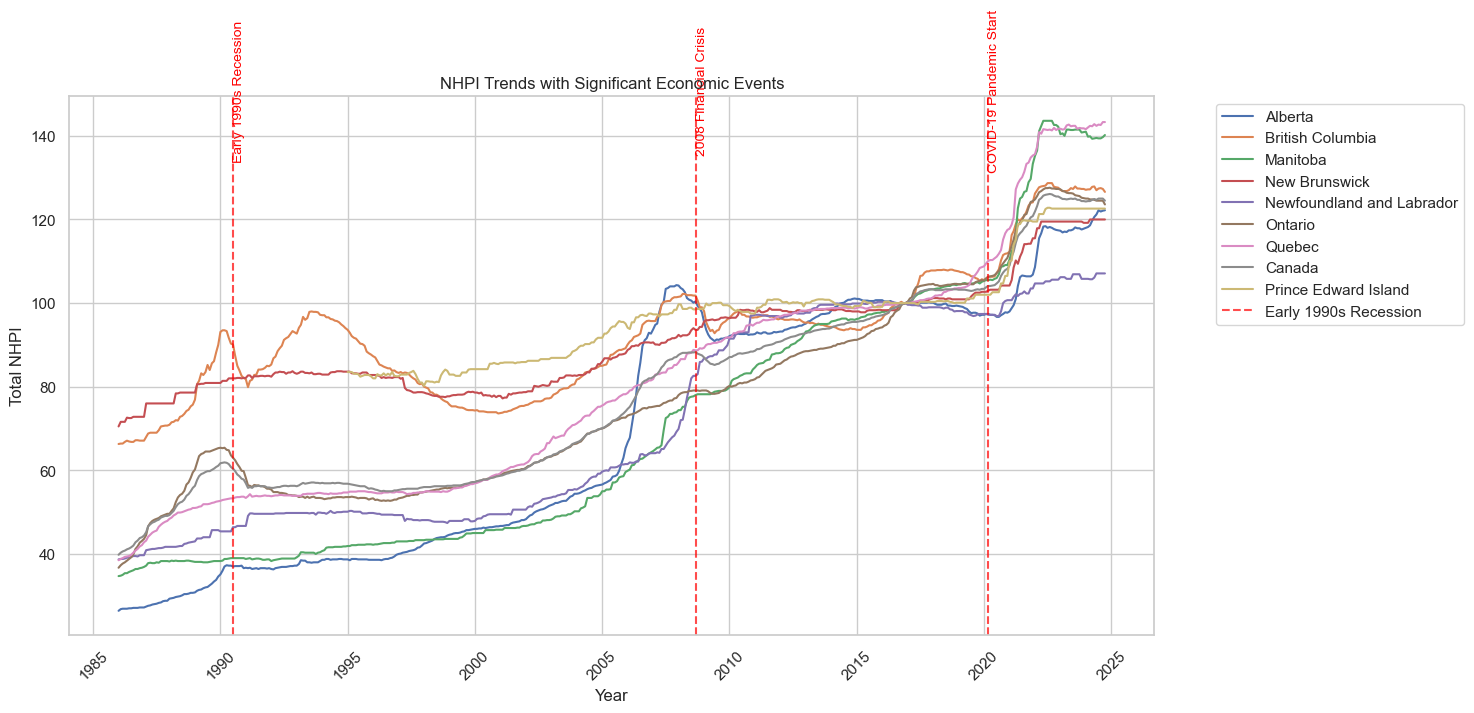

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure REF_DATE is in datetime format
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Define significant economic events
significant_dates = pd.to_datetime(['1990-07-01', '2008-09-01', '2020-03-01'])
events = ['Early 1990s Recession', '2008 Financial Crisis', 'COVID-19 Pandemic Start']

# Create the plot
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='REF_DATE', y='Total (house and land) NHPI', hue='GEO')

# Ensure x-axis is treated as datetime
plt.gca().xaxis_date()

# Mark economic events on the timeline
for i, event in enumerate(significant_dates):
    plt.axvline(event, linestyle='--', color='red', alpha=0.7, label=events[i] if i == 0 else "")
    plt.text(event, df['Total (house and land) NHPI'].max() * 1.05, events[i],
             rotation=90, verticalalignment='center', color='red', fontsize=10)

plt.title('NHPI Trends with Significant Economic Events')
plt.xlabel('Year')
plt.ylabel('Total NHPI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


### Cluster Profiling (Exploring Regional Groups)


In [55]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_features])

# Group by 'Cluster' and 'GEO' and calculate the mean of numerical features
cluster_summary = df.groupby(['Cluster', 'GEO'])[numerical_features].mean().reset_index()
print(cluster_summary)


c:\Users\schac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    Cluster                        GEO  Housing completions  Housing starts  \
0         0                    Alberta          8791.059526     9903.515535   
1         0           British Columbia          9461.525889    10832.614526   
2         0                     Canada          6790.195105    11773.482527   
3         0                   Manitoba          5888.237544     6584.649991   
4         0              New Brunswick          5944.045811     6655.905253   
5         0  Newfoundland and Labrador          6113.154506     6802.567382   
6         0                    Ontario         12189.569902    14542.414100   
7         0       Prince Edward Island          7867.661404     8976.353898   
8         0                     Quebec         15178.665063    16877.359533   
9         1                     Canada        127539.648649   139227.651351   
10        1                    Ontario         50179.750000    70323.250000   
11        2           British Columbia         25896

**Cluster Analysis of Housing Trends**

| Cluster | Province | Avg. Housing Completions | Avg. Housing Starts | Avg. Housing Under Construction |
|---------|-------------|----------------------|-----------------|-----------------|
| **Cluster 0** | Majority of provinces | ~8,000 - 15,000 | ~10,000 - 16,000 | ~20,000 - 40,000 |
| **Cluster 1** | Canada (Nationwide), Ontario | **127,000+** | **139,000+** | **601,000+** |
| **Cluster 2** | British Columbia, Ontario, Quebec | **25,000 - 50,000** | **30,000 - 48,000** | **166,000 - 455,000** |

**Insights from Clustering:**
- **Cluster 0**: Represents most provinces with **moderate housing activity**.
- **Cluster 1**: Represents **Canada-wide and Ontario, showing extreme high levels of activity**.
- **Cluster 2**: Represents **major provinces (BC, Ontario, Quebec) with consistently high construction** but below national aggregate levels.

 **Business Concerns:**
- Ontario appears in **both Cluster 1 and Cluster 2**, suggesting **multiple market segments—one highly extreme and one still growing**.
- Canada-wide data suggests a **huge variance in construction projects**, possibly due to large-scale policy interventions or infrastructure projects.
- The **high values for housing under construction in Cluster 1 suggest that completions might be lagging significantly**.


Distribution and Density Plots for Deeper Insights


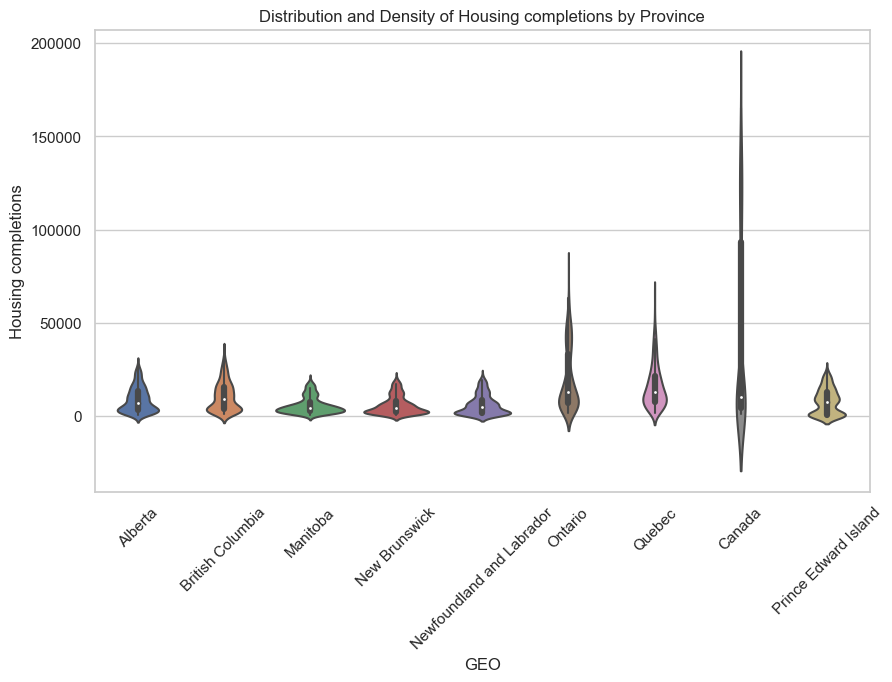

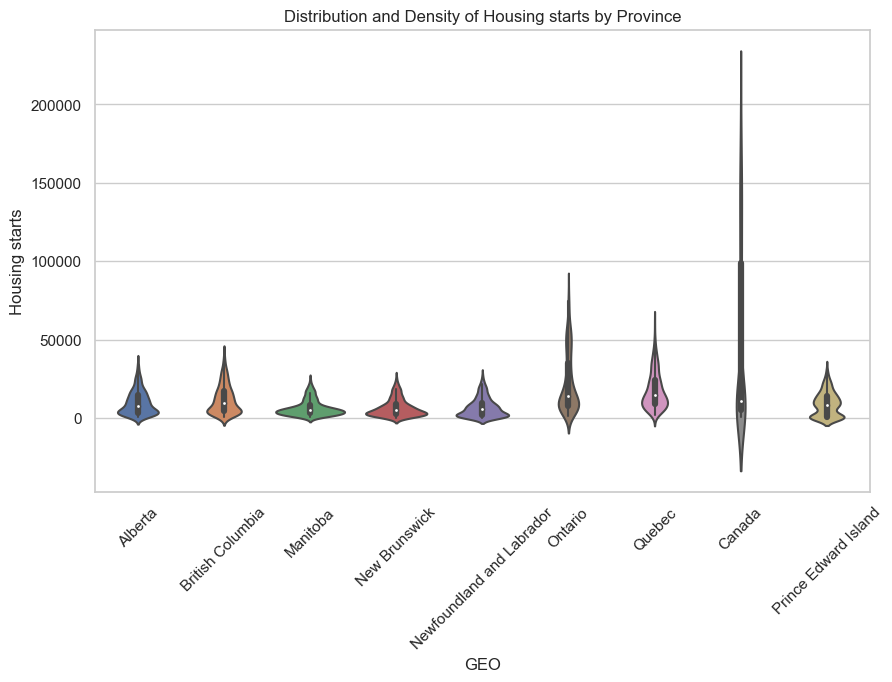

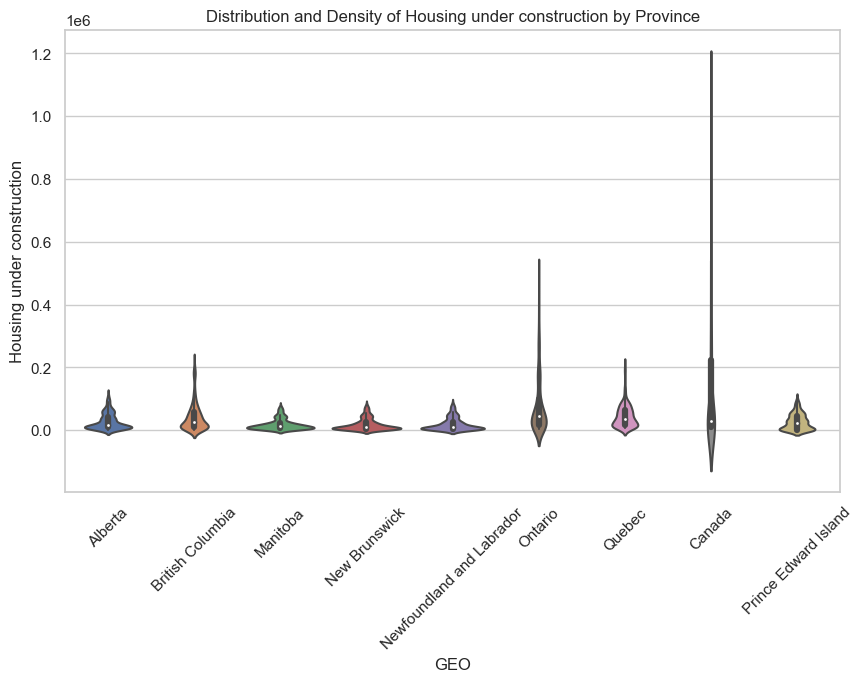

In [56]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='GEO', y=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution and Density of {col} by Province')
    plt.show()


**Conclusions from Distribution, Density, and Cluster Analysis**

### **1️ Housing Under Construction Distribution & Density**
- **Trend:** Ontario, Quebec, and British Columbia have significantly higher housing under construction compared to other provinces.
- **Extreme Values:**
  - **Ontario and Quebec show the widest distribution**, suggesting high variability in housing under construction.
  - **Canada-wide distribution has extreme outliers**, indicating large-scale nationwide projects.

 **Implications:**
- The **higher density in these provinces suggests strong ongoing construction activity**—potentially driven by urbanization, economic growth, or migration trends.
- Variability suggests **potential supply-chain or labor issues affecting construction timelines**.

---

### **2️ Housing Starts Distribution & Density**
- **Trend:** British Columbia, Ontario, and Quebec have **higher median values** compared to smaller provinces.
- **Extreme Values:**
  - The **Canada-wide data shows a long upper tail**, indicating large-scale housing initiatives in certain periods.
  - **Ontario and Quebec also display outliers**, signifying spikes in housing starts at different points in time.

 **Implications:**
- **Provinces with frequent housing start spikes might be responding to housing shortages** or policy-driven initiatives (e.g., government housing programs).
- **Smaller provinces exhibit lower variance**, indicating **more stable but smaller-scale development activity**.

---

### **3 Housing Completions Distribution & Density**
- **Trend:** Housing completions follow a similar pattern to starts, with **Ontario, Quebec, and British Columbia leading**.
- **Extreme Values:**
  - Large variations in completion timelines for Ontario, which might be caused by **delays in construction due to labor shortages or regulatory approvals**.

 **Implications:**
- If **completions do not keep pace with starts**, this could signal potential bottlenecks in project finalization, leading to **increased housing costs**.
- High variance in completions in some provinces suggests that **projects are being completed in bursts rather than in a steady stream**.

---

## Correlation Heatmap

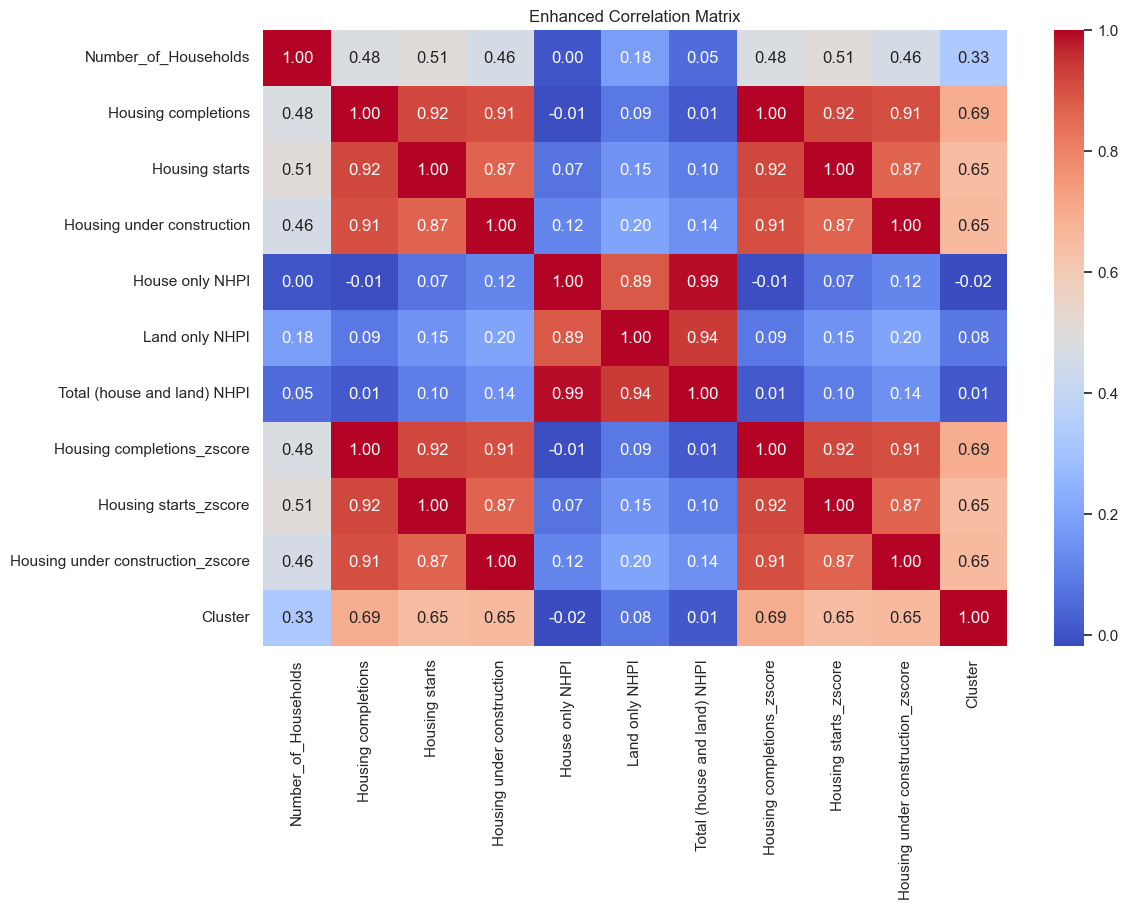

In [57]:
# Enhanced Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Enhanced Correlation Matrix')
plt.show()


### Housing Supply vs Demand

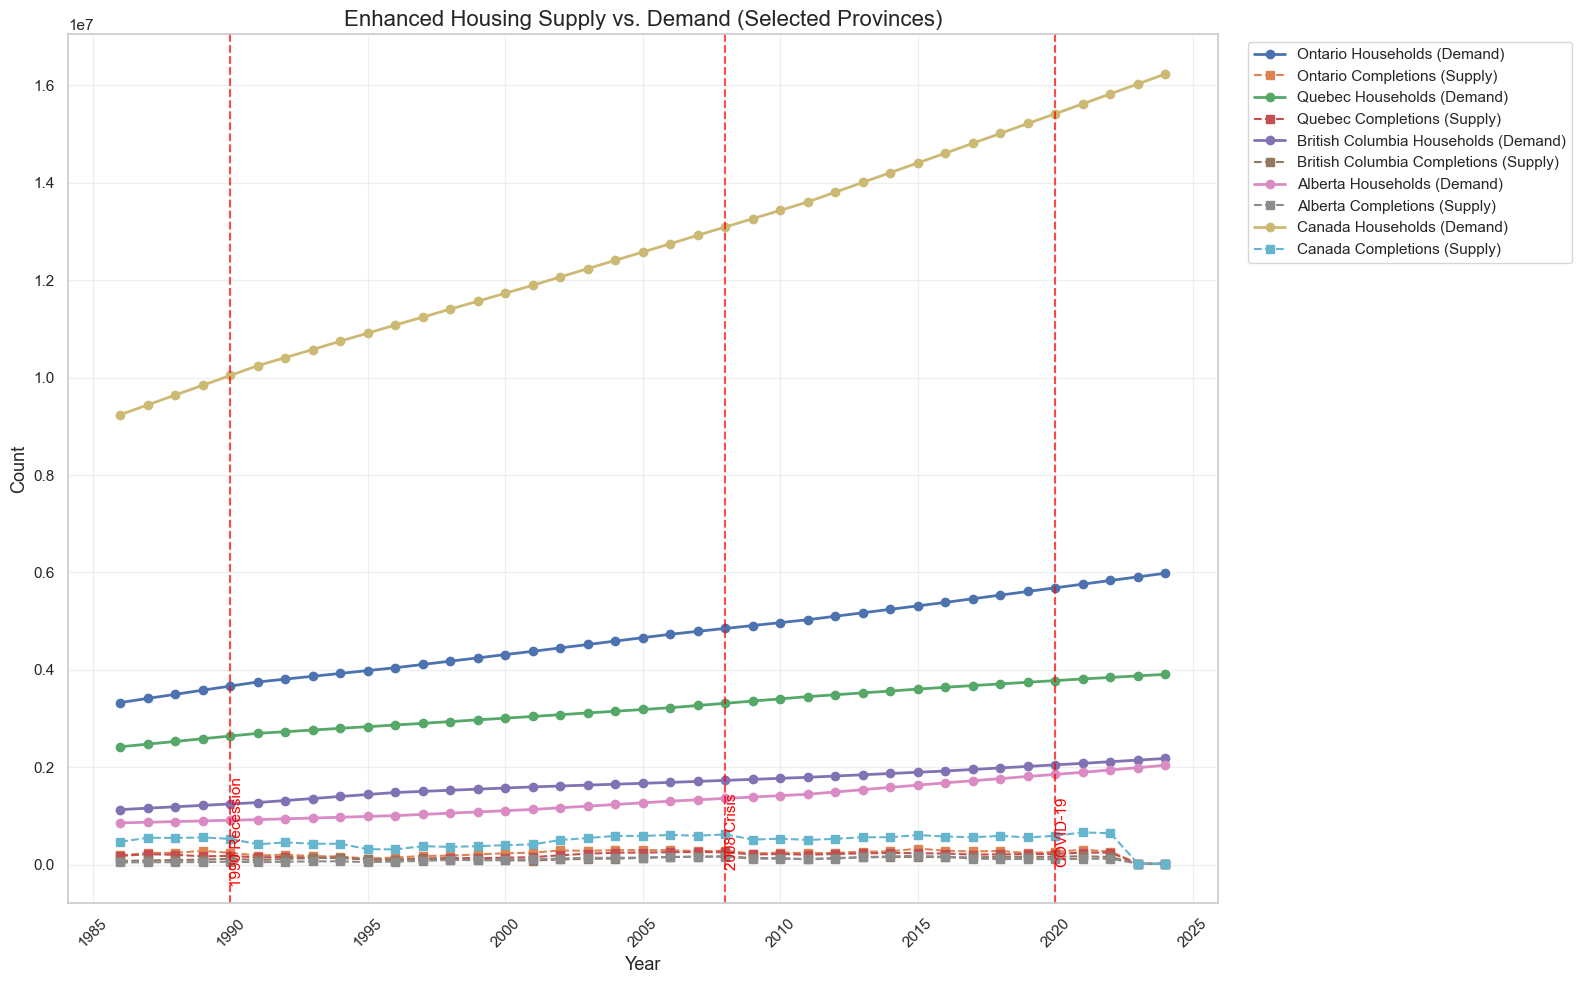

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate annual data
provincial_data = df.groupby(['Year', 'GEO']).agg({
    'Number_of_Households': 'mean',
    'Housing completions': 'sum'
}).reset_index()

# Select key provinces for clarity
key_provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta', 'Canada']

plt.figure(figsize=(16, 10))

for province in key_provinces:
    temp_df = provincial_data[provincial_data['GEO'] == province]
    plt.plot(temp_df['Year'], temp_df['Number_of_Households'], linestyle='-', linewidth=2, marker='o', label=f'{province} Households (Demand)')
    plt.plot(temp_df['Year'], temp_df['Housing completions'], linestyle='--', marker='s', label=f'{province} Completions (Supply)')

# Highlight significant economic events
for event_year, label in zip([1990, 2008, 2020], ['1990 Recession', '2008 Crisis', 'COVID-19']):
    plt.axvline(event_year, color='red', linestyle='--', alpha=0.7)
    plt.text(event_year, provincial_data['Housing completions'].max()*1.02, label,
             rotation=90, verticalalignment='center', fontsize=11, color='red')

plt.title('Enhanced Housing Supply vs. Demand (Selected Provinces)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
